## The most popular TV show -  a real world use case
In this section, we will be taking on the very fortunate position or role of a Facebook data scientist
to determine, among other things, what the most popular TV show in our dataset is. This will test
the knowledge we have gained so far and will take you through a typical use case that gets asked of
a graph data scientist.

We will be looking at the following steps to achieve our end goal of finding the most popular television
show, using the new knowledge we have acquired up to this point:
1. We start by doing some analysis of the structure of the data in our graph; this will focus on
common data science techniques to visualize the distribution, such as a histogram of the graph.
2. Connectedness of the graph will be our next port of call. This is an important step, as it allows
you to see how connected your components are in your graph. We will focus on our mutual
likes dataset on Facebook to achieve this and will look at top degree node connectivity.
3. Finally, we will build out our initial recommendation engine to recommend the TV shows in
this case.

#### Examining the graph structure
Now that we have our data in a graph model, we can consider some network-based analysis. A good place to start is examining some general properties of the graph, to get an idea of its structure.

It is common practice in network analysis to take a look at the degree distribution of a graph. Each node has a degree centrality, which in its simplest form is the number of nodes that it shares an edge with. Hence, the degree distribution is essentially a histogram of node-degree centralities, for a whole graph.

In [1]:
## Getting started

import matplotlib as plt
import igraph

# import custom functions
from graphtastic.utils import graph_from_attributes_and_edgelist

In [2]:
# Importing parameters and graph data
node_attr_path = './data/musae_facebook_target.csv'
edgelist_csv = './data/musae_facebook_edges.csv'
attributes = ["page_name", "page_type"]

g = graph_from_attributes_and_edgelist(node_attr_path, edgelist_csv, attributes)

In [4]:
histogram = g.degree_distribution(bin_width=5)
print(histogram)

N = 22470, mean +- sd: 15.2205 +- 26.4144
Each * represents 141 items
[  0,   5): *********************************************************** (8324)
[  5,  10): *********************************** (4989)
[ 10,  15): ***************** (2510)
[ 15,  20): *********** (1642)
[ 20,  25): ******** (1130)
[ 25,  30): ***** (837)
[ 30,  35): **** (603)
[ 35,  40): *** (458)
[ 40,  45): ** (356)
[ 45,  50): * (256)
[ 50,  55): * (224)
[ 55,  60): * (174)
[ 60,  65): * (157)
[ 65,  70):  (129)
[ 70,  75):  (92)
[ 75,  80):  (71)
[ 80,  85):  (58)
[ 85,  90):  (55)
[ 90,  95):  (50)
[ 95, 100):  (35)
[100, 105):  (31)
[105, 110):  (36)
[110, 115):  (28)
[115, 120):  (22)
[120, 125):  (24)
[125, 130):  (13)
[130, 135):  (12)
[135, 140):  (12)
[140, 145):  (17)
[145, 150):  (14)
[150, 155):  (4)
[155, 160):  (8)
[160, 165):  (2)
[165, 170):  (5)
[170, 175):  (5)
[175, 180):  (4)
[180, 185):  (6)
[185, 190):  (4)
[190, 195):  (4)
[195, 200):  (4)
[200, 205):  (4)
[205, 210):  (1)
[210, 215):  (3)
[2

Our histogram plot shows us that in our mutual Facebook likes graph, there are 8,324 nodes that are
connected to a maximum of 4 other nodes (note that the (0, 5] range notation shown on the left
side of the printed histogram is exclusive of nodes with a degree centrality of 5). At the other end of
the scale, our most connected node has a degree centrality of somewhere between 705 and 709, with
the second most connected node having a degree centrality of between 675 and 679.

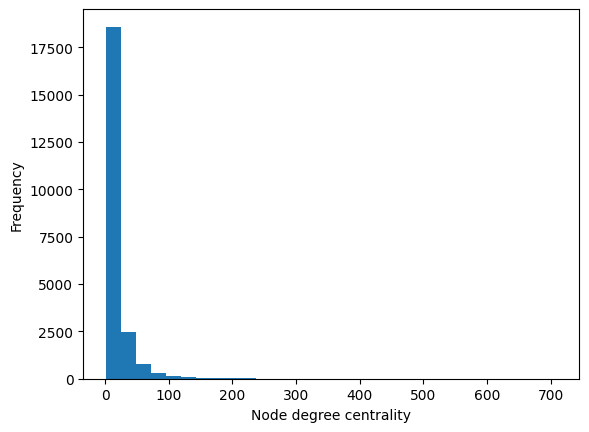

In [5]:
import matplotlib.pyplot as plt
bins = 30
plt.hist(g.degree(), bins)
plt.xlabel('Node degree centrality')
plt.ylabel('Frequency')
plt.show()

The type of graph structure we see here, where many nodes have few connections and few nodes have
many connections, is very common. For reference, nodes that are highly connected in any given graph
are known as hubs or hub nodes. These hub nodes are often responsible for a disproportionate level
of connectivity between nodes, which gives rise to phenomena such as the six degrees of separation
in social networks, where just six friends of friends can be used to connect any two people. We will
explore these concepts in detail in later chapters, but for now, we’ll focus on identifying nodes of
importance in our Facebook graph.

#### Measuring connectedness
Not all graphs are fully connected, and it may be of interest to learn about this aspect of our Facebook
mutual likes dataset. If any node in a graph cannot be reached from another node when traversing
through edges, then a graph is fragmented. Each distinct part of the graph in this case is known as a
connected component.
Let’s use igraph to check how many connected components are in our Facebook mutual likes graph.
We can use igraph’s inbuilt clusters() method to do this easily:

In [6]:
connected_components = g.clusters()
print(connected_components)

Clustering with 22470 elements and 1 clusters
[0] 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
    39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56,
    57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
    75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
    93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
    109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
    124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
    139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
    154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
    169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
    184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
    199, 200, 201, 20

C:\Users\Dee\AppData\Local\Temp\ipykernel_26148\85955574.py:1: DeprecationWarning: Graph.clusters() is deprecated; use Graph.connected_components() instead
  connected_components = g.clusters()


Our print statement will show us how many connected components are in our graph, and the
membership of each, in terms of nodes. In this graph, we have only one connected component,
indicating that the graph is fully connected.

Note that with our undirected graph, connected components are slightly simpler to understand than in
a directed graph. For a directed graph, sometimes a part of a graph can only be reached by traversing
in the wrong direction along an edge. If this is the case, then that part of the graph is known as a
weakly connected component. A strongly connected component, in contrast, can be accessed by other
nodes in the graph following the native edge direction. The igraph library allows you to specify the
mode of the clusters() method as a parameter, which can be set to weak or strong. In our
undirected graph case, we can allow igraph to default mode to strongly connected components.

Now that we have learned about the structure of our graph, which is always a good practice in graph
applications, we can start to delve deeper into some specific elements and areas of our graph dataset.

#### Looking at the top degree nodes
The following steps will look at how to work with the top degree nodes in your network and the steps
to implement this in Python:

To view the top degree centrality nodes, we first use zip to combine two tuples into a list wrapper; these tuples are page_name and the degree of association between the nodes. 

In [7]:
degree = list(zip(g.vs['page_name'], g.degree()))
#print(degree)
sorted_degree =  sorted(degree, key=lambda x: x[1], reverse=True)
print(sorted_degree[:10])

[('The Voice of China 中国好声音', 1), ('U.S. Consulate General Mumbai', 34), ('ESET', 12), ('Consulate General of Switzerland in Montreal', 10), ('Mark Bailey MP - Labor for Miller', 51), ('Victor Dominello MP', 22), ('Jean-Claude Poissant', 16), ('Deputado Ademir Camilo', 3), ('T.C. Mezar-ı Şerif Başkonsolosluğu', 3), ('Army ROTC Fighting Saints Battalion', 2), ('NASA Student Launch', 3), ('Eliziane Gama', 4), ('Socialstyrelsen', 6), ('Brisbane Water LAC - NSW Police Force', 17), ("NASA's Marshall Space Flight Center", 55), ('Municipio de Lomas de Zamora', 3), ('Die Techniker (TK)', 1), ('Digvijaya Singh', 4), ('1st Armored Division Sustainment Brigade', 38), ('Shapeways', 13), ('Françoise Guégot', 1), ('Hydro Coco', 3), ('Embassy of the Netherlands in Uganda', 28), ('Ford Danmark', 4), ('Schweppes Australia', 4), ('TalkTalk', 5), ('National Institute of General Medical Sciences', 30), ('Poppy Cat', 6), ('Tahiti Tourisme', 4), ('Marriott Rewards', 15), ('TeleCentro', 5), ('Ministerio de C

From the print to console, we can see that the US Army node has the highest degree centrality, with 709 mutual likes. To connect this back to real world data, consider what this indicates about the US Army Facebook page. Not only is this a popular liked page among other government organizations, politicians, TV shows, and companies, but it also shows that the US Army page is active in likingg these pages back in return. 

If we want to take a look at top degree nodes of a certain type, then we need to adjust our
igraph code. To find the top degree centrality TV show, we can use the `vs.select()`
method with a parameter that specifies what page type we are looking for, `page_type_eq`.
Then, as in the previous code snippet, we can zip the degrees and page names together—this
time just for TV show nodes—order them, and print the results:


In [11]:
tv_nodes = g.vs.select(page_type_eq='tvshow')
tv_indices = [node.index for node in tv_nodes]
tv_degree = list(zip(g.vs[tv_indices]['page_name'], g.degree(tv_indices)))
sorted_tv_degree = sorted(tv_degree, key=lambda x: x[1], reverse=True)
print(sorted_tv_degree[:10])

[('Today Show', 141), ('Home & Family', 137), ('tagesschau', 119), ('The Simpsons', 110), ('Glee', 101), ('So You Think You Can Dance', 99), ('Family Guy', 91), ('MasterChef', 90), ('Dancing with the Stars', 90), ('New Girl', 90)]


#### Using `select()` to interrogate the graph
In the previous section, we used vs.select(), which is worth discussing in more detail, as it is a
particularly powerful method. Its power stems from its flexible parameters, which are comprised of
node types or attributes, and comparison operators.
In the prior example, we used the page_type_eq parameter, set to tvshow. This tells vs.select()
to search for nodes that have a page_type attribute equal (designated by _eq) to tvshow. Here,
`_eq` could be substituted for many other operators, as follows:

In [13]:
gov_pol_nodes = g.vs.select(page_type_in = ['government', 'politician'])
gov_pol_indices = [node.index for node in gov_pol_nodes]
gov_pol_degree = list(zip(g.vs[gov_pol_indices]['page_name'], g.degree(gov_pol_indices)))
print(gov_pol_degree[:10])

[('U.S. Consulate General Mumbai', 34), ('Consulate General of Switzerland in Montreal', 10), ('Mark Bailey MP - Labor for Miller', 51), ('Victor Dominello MP', 22), ('Jean-Claude Poissant', 16), ('Deputado Ademir Camilo', 3), ('T.C. Mezar-ı Şerif Başkonsolosluğu', 3), ('Army ROTC Fighting Saints Battalion', 2), ('NASA Student Launch', 3), ('Eliziane Gama', 4)]


Further to this, adding an underscore before a Graph() method, within a select()method, allows
the calculation of a node property on the fly. For example, we can look for all TV show nodes with a
degree of between 100 and 140 using the following code:

In [15]:
one_to_three_100_nodes = g.vs.select(_degree_ge = 100,
                                     _degree_le = 140,
                                     page_type_eq = 'tvshow')
print(one_to_three_100_nodes['page_name'])

['The Simpsons', 'Home & Family', 'tagesschau', 'Glee']


Here, the select() parameters were layered to return a more specific set of just four nodes meeting
our criteria. We also used degree in a select() method by preceding the degree keyword with
an underscore. For example, to get a degree greater than 100, we used the magic method _degree_
ge=100; this acted as our lower bound, and the upper bound was specified as _degree_le=140.
It is worth noting that this calculation of node and graph features on the fly with select() is most
appropriate for simple calculations such as degrees. With some more computationally demanding
network science calculations, it may be better to add the calculated node property as a node attribute
rather than calculating it twice, as in the previous example with degree.


To illustrate, the previous example can be rewritten as follows so that node degree is calculated only
once, written to graph nodes as the node_degree_ property, then queried by select(), rather
than computing the degree for each comparison:

In [16]:
g.vs['node_degree'] = g.degree()
one_to_three_100_nodes = g.vs.select(node_degree_ge=100,
node_degree_le=140,
page_type_eq='tvshow')
print(one_to_three_100_nodes['page_name'])

['The Simpsons', 'Home & Family', 'tagesschau', 'Glee']


#### Properties of our popular nodes
Knowing more about the select() method, we can now delve into exploring the properties of our
most popular TV show node, and learn about its importance in the mutual likes Facebook graph.

We found earlier that the most popular TV show node, in terms of mutual likes, is the Today Show,
with a degree centrality of 141. We can learn more about our top degree centrality node by examining
its neighbors. In an undirected network, such as our Facebook mutual likes graph, nodes connected
by an edge are known as incident nodes. Finding all incident nodes of the Today Show will reveal
which Facebook pages share a mutual interest in each other, in our dataset.

To look into this, we will be using the select() method again, this time for edges. The
es.select() method can find edges according to their attributes (if they have any), using
the same syntax as in Table 2.1. However, our edges contain no attributes, and we are more
interested in the nodes they link.

As with the vs.select() method, es.select() has some special parameters that can
be used to find edges that link nodes with particular criteria—again, each starting with an
underscore.

In [17]:
today_show_id = g.vs.select(page_name_eq = 'Today Show')[0].index
print(today_show_id)

909


Now, we can find edges that contain node 909 using es.select(). We specify the _incident
parameter is equal to our today_show_id variable, and put it inside a list

In [27]:
today_show_edges = g.es.select(_incident=[today_show_id])
sources = [edge.source for edge in today_show_edges]
targets = [edge.target  for edge in today_show_edges]
print(sources)
print(targets)

[42, 278, 484, 866, 871, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909, 909]
[909, 909, 909, 909, 909, 21784, 5683, 11273, 8353, 12936, 6199, 9677, 19519, 9339, 2100, 6011, 9018, 5306, 2105, 6722, 6475, 18471, 2187, 1660, 2544, 5495, 7320, 2268, 15072, 11634, 2192, 9337, 14981, 1578, 9882, 19885, 6390, 9087, 6671, 21033, 12076, 5021, 9604, 13621, 6213, 18886, 16275, 553

This will show us two lists of node IDs, all present in edges incident to the Today Show.

```
Note that in our mutual likes graph, source and target are in reality equivalent, as the graph
is undirected. Here, source and target are merely denoted by igraph for each edge, based
on the index of each two-element node pair that was added previously with add_edges().
```

Notice that node 909, representing the Today Show, is present multiple times in our lists. This
is as expected because we asked igraph to return all edges containing it. However, for our
purposes of examining the neighboring nodes of the Today Show, we need to remove it from
our results. We can use set()to return a unique set of elements from the concatenation of
our sources and targets lists, then remove node 909, corresponding to the Today Show:

In [28]:
neighbor_nodes = list(set(sources + targets))
neighbor_nodes.remove(909)
print(neighbor_nodes)
print(len(neighbor_nodes))

[9220, 18952, 11273, 13323, 6158, 6671, 2576, 19984, 20504, 21532, 2595, 12838, 18471, 21033, 42, 1578, 15915, 4141, 5683, 2100, 10805, 4150, 6199, 2105, 19519, 6722, 6213, 2117, 14918, 5198, 18003, 12376, 1639, 20584, 19573, 15478, 9337, 9339, 1660, 14981, 12936, 2187, 2192, 21141, 11415, 7320, 9882, 8353, 2726, 2743, 16568, 5306, 22210, 1220, 14532, 2245, 9940, 20693, 14553, 2268, 21214, 15072, 22243, 21222, 6390, 21750, 1272, 11008, 9475, 14596, 18180, 6411, 15116, 278, 21784, 2842, 14619, 18208, 20770, 18216, 12076, 2860, 19762, 13621, 11061, 9018, 11073, 4930, 18760, 3400, 6475, 5453, 16727, 18273, 866, 871, 7533, 13168, 11634, 18803, 5495, 6011, 9597, 9087, 4480, 9604, 12165, 12677, 9096, 20363, 14221, 16275, 8087, 8600, 5531, 20892, 5021, 19885, 21432, 17344, 20421, 18886, 9677, 6606, 1485, 2514, 15315, 5077, 10711, 20443, 14814, 19938, 16355, 484, 7142, 3047, 19943, 9196, 2544, 15862, 16887]
141


Our first print() statement should now show a list of unique node IDs. We can also print
the number of unique neighbor_nodes list elements, which should be 141. Note that this
is equal to the degree centrality of the Today Show calculated previously.

In [29]:
neighbor_page_types = g.vs[neighbor_nodes]['page_type']
print(neighbor_page_types)

['government', 'tvshow', 'government', 'government', 'company', 'company', 'tvshow', 'company', 'company', 'tvshow', 'company', 'company', 'company', 'government', 'company', 'company', 'company', 'company', 'government', 'tvshow', 'company', 'tvshow', 'tvshow', 'company', 'company', 'company', 'tvshow', 'tvshow', 'government', 'tvshow', 'tvshow', 'company', 'government', 'tvshow', 'government', 'company', 'tvshow', 'government', 'company', 'government', 'government', 'company', 'company', 'company', 'tvshow', 'government', 'tvshow', 'tvshow', 'company', 'tvshow', 'company', 'government', 'company', 'company', 'company', 'government', 'tvshow', 'company', 'company', 'company', 'company', 'government', 'politician', 'tvshow', 'tvshow', 'company', 'tvshow', 'tvshow', 'company', 'tvshow', 'company', 'tvshow', 'government', 'company', 'company', 'company', 'company', 'tvshow', 'government', 'government', 'tvshow', 'company', 'company', 'tvshow', 'company', 'tvshow', 'company', 'company', '

A quick glance at the list we printed out shows us that there is a good mix of page types that
share a mutual like with our TV show of interest. To count these types of pages, we can use the
Counter() method from the native collections Python library:

In [30]:
from collections import Counter
page_type_dict = Counter(neighbor_page_types)
print(page_type_dict)

Counter({'company': 75, 'tvshow': 37, 'government': 28, 'politician': 1})


The Counter() method finds the frequency of the unique elements in our list and returns it
as a dictionary. Printing this dictionary out, we can see that companies make up over half of the
shared page likes with the Today Show, followed by other TV shows, government organizations,
and finally, a single politician.

Let’s see who this lone politician is. We can use the zip() method to join the node ID list and
the page-type list together element-wise, and use the zipped iterable (a Python object that can
be looped or iterated over) to locate the ID representing this politician:

In [32]:
ids_and_page_types = zip(neighbor_nodes, neighbor_page_types)
politician_id = [id_tuple for id_tuple in list(ids_and_page_types) if id_tuple[1] == 'politician']
print(politician_id)

[(22243, 'politician')]


We find that the ID for this politician is 22243, so to find the page name of this node, we can
use g.vs to query the node attribute:

In [33]:
politician_name = g.vs[22243]['page_name']
print(politician_name)

Aníbal José Torres


Upon the completion of preceding steps, this reveals that the only politician sharing a mutual
like with the Today Show is Aníbal José Torres.

In [34]:
g.vs[22240]

igraph.Vertex(<igraph.Graph object at 0x000001BA90846350>, 22240, {'page_name': 'Congresswoman Dina Titus', 'page_type': 'politician', 'node_degree': 21})